In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Analyzing and Preprocessing

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')
data.shape

(2938, 22)

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [6]:
data['Status'].replace({
    'Developing' : 0,
    'Developed' : 1
}, inplace=True)

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
data[' BMI '] = data[' BMI '].apply(lambda v: (v - data[' BMI '].min())/(data[' BMI '].max()-data[' BMI '].min()))
data['Schooling'] = data['Schooling'].apply(lambda v: (v - data['Schooling'].min())/(data['Schooling'].max()-data['Schooling'].min()))
data['Income composition of resources'] = data['Income composition of resources'].apply(lambda v: (v - data['Income composition of resources'].min())/(data['Income composition of resources'].max()-data['Income composition of resources'].min()))
data['Diphtheria '] = data['Diphtheria '].apply(lambda v: (v - data['Diphtheria '].min())/(data['Diphtheria '].max()-data['Diphtheria '].min()))
data['Polio'] = data['Polio'].apply(lambda v: (v - data['Polio'].min())/(data['Polio'].max()-data['Polio'].min()))
data['GDP'] = data['GDP'].apply(lambda v: (v - data['GDP'].min())/(data['GDP'].max()-data['GDP'].min()))
data['Adult Mortality'] = data['Adult Mortality'].apply(lambda v: (v - data['Adult Mortality'].min())/(data['Adult Mortality'].max()-data['Adult Mortality'].min()))
data[' HIV/AIDS'] = data[' HIV/AIDS'].apply(lambda v: (v - data[' HIV/AIDS'].min())/(data[' HIV/AIDS'].max()-data[' HIV/AIDS'].min()))
data[' thinness  1-19 years'] = data[' thinness  1-19 years'].apply(lambda v: (v - data[' thinness  1-19 years'].min())/(data[' thinness  1-19 years'].max()-data[' thinness  1-19 years'].min()))
data[' thinness 5-9 years'] = data[' thinness 5-9 years'].apply(lambda v: (v - data[' thinness 5-9 years'].min())/(data[' thinness 5-9 years'].max()-data[' thinness 5-9 years'].min()))

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,0.362881,62,0.01,71.279624,65.0,1154,...,0.031250,8.16,0.649485,0.0,0.004889,33736494.0,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,2014,0,59.9,0.373961,64,0.01,73.523582,62.0,492,...,0.572917,8.18,0.618557,0.0,0.005127,327582.0,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,2013,0,59.9,0.369806,66,0.01,73.219243,64.0,430,...,0.614583,8.13,0.639175,0.0,0.005287,31731688.0,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,2012,0,59.5,0.375346,69,0.01,78.184215,67.0,2787,...,0.666667,8.52,0.670103,0.0,0.005608,3696958.0,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,2011,0,59.2,0.379501,71,0.01,7.097109,68.0,3013,...,0.677083,7.87,0.680412,0.0,0.000519,2978599.0,0.655797,0.635088,0.478903,0.458937


In [8]:
data.to_csv('Life Expectancy Data Preprocessed.csv', index=False)

<AxesSubplot:>

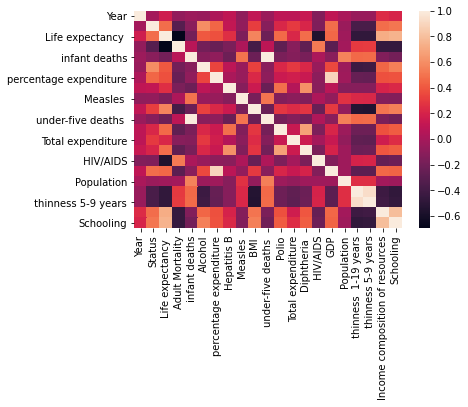

In [9]:
sns.heatmap(data.corr())

In [10]:
data.corr()['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Status                             0.482136
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

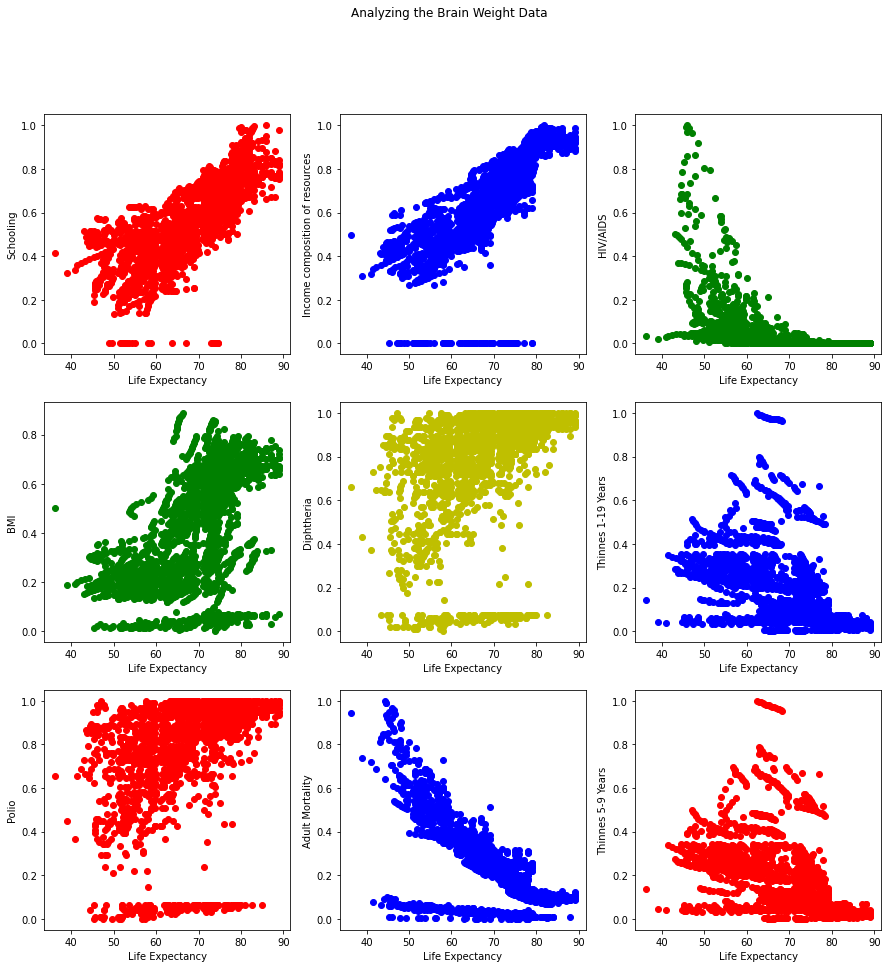

In [11]:
# It's obvious that the features having biggest correlation score are: 'Schooling', 'Income composition of resources', 
# 'BMI' and 'Diphtheria'.

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Analyzing the Brain Weight Data')

axes[0, 0].scatter(data['Life expectancy '].values, data['Schooling'].values, c='r')
axes[0, 0].set(xlabel='Life Expectancy', ylabel='Schooling')

axes[0, 1].scatter(data['Life expectancy '].values, data['Income composition of resources'].values, c='b')
axes[0, 1].set(xlabel='Life Expectancy', ylabel='Income composition of resources')

axes[1, 0].scatter(data['Life expectancy '].values, data[' BMI '].values, c='g')
axes[1, 0].set(xlabel='Life Expectancy', ylabel='BMI')

axes[1, 1].scatter(data['Life expectancy '].values, data['Diphtheria '].values, c='y')
axes[1, 1].set(xlabel='Life Expectancy', ylabel='Diphtheria')

axes[2, 0].scatter(data['Life expectancy '].values, data['Polio'].values, c='r')
axes[2, 0].set(xlabel='Life Expectancy', ylabel='Polio')

axes[2, 1].scatter(data['Life expectancy '].values, data['Adult Mortality'].values, c='b')
axes[2, 1].set(xlabel='Life Expectancy', ylabel='Adult Mortality')

axes[0, 2].scatter(data['Life expectancy '].values, data[' HIV/AIDS'].values, c='g')
axes[0, 2].set(xlabel='Life Expectancy', ylabel='HIV/AIDS')

axes[1, 2].scatter(data['Life expectancy '].values, data[' thinness  1-19 years'].values, c='b')
axes[1, 2].set(xlabel='Life Expectancy', ylabel='Thinnes 1-19 Years')

axes[2, 2].scatter(data['Life expectancy '].values, data[' thinness 5-9 years'].values, c='r')
axes[2, 2].set(xlabel='Life Expectancy', ylabel='Thinnes 5-9 Years')

plt.show()

In [12]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
data_new = data.dropna(axis=0) #All samples that contains any nan value
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int64  
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [14]:
'''
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if pd.isna(data[i,j]) == 1:
            data[i,j] = mean[j] 
x = np.delete(data,3,1)
y = data[:,3]
print(x.shape, y.shape)
'''

'\nfor i in range(data.shape[0]):\n    for j in range(data.shape[1]):\n        if pd.isna(data[i,j]) == 1:\n            data[i,j] = mean[j] \nx = np.delete(data,3,1)\ny = data[:,3]\nprint(x.shape, y.shape)\n'

### Train and Test

In [15]:
# We will use 'Status', 'BMI', 'Schooling', 'Income composition of resources', 'Diphtheria', 'Polio', 'Adult Mortality'
# 'HIV/AIDS', 'thinness  1-19 years' and 'thinness  5-19 years' since their high correlation scores

y = data_new['Life expectancy ']
x = data_new[['Status', ' BMI ', 'Schooling', 'Income composition of resources', 'Diphtheria ', 'Polio', 'Adult Mortality', 
            ' HIV/AIDS', ' thinness 5-9 years', ' thinness  1-19 years']]

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print('Xtrain Shape:', x_train.shape, '\nXtest Shape:', x_test.shape, '\nYtrain Shape:' ,y_train.shape, '\nYtest Shape:', y_test.shape)

Xtrain Shape: (1154, 10) 
Xtest Shape: (495, 10) 
Ytrain Shape: (1154,) 
Ytest Shape: (495,)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_predict)
R2E = r2_score(y_test, y_predict)
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)
print("MSE: %.2f " % MSE)
print("R2E: %.2f " % R2E)

Coefficient:  [  0.81689923   3.09909186  18.84324999   9.29607351   1.47622974
   1.1559479  -12.65602229 -22.30300366  -2.55206551   0.78507523]
Intercept:  52.41602047321259
MSE: 13.60 
R2E: 0.81 


In [19]:
for i in range(10):
    print('Prediction: ', y_predict[i], '\tReal Value:', y_test.values[i])

Prediction:  65.64896502745758 	Real Value: 65.3
Prediction:  66.24930918816771 	Real Value: 61.6
Prediction:  75.14352902042833 	Real Value: 72.9
Prediction:  66.73999050794396 	Real Value: 63.8
Prediction:  67.2422872693693 	Real Value: 73.0
Prediction:  65.82929839408246 	Real Value: 63.2
Prediction:  73.36263721533253 	Real Value: 68.5
Prediction:  74.26855926578189 	Real Value: 74.0
Prediction:  70.0953757670965 	Real Value: 68.5
Prediction:  80.41169959073316 	Real Value: 82.5


Text(0.5, 1.0, 'Linear Regression - WHO Life Expectancy')

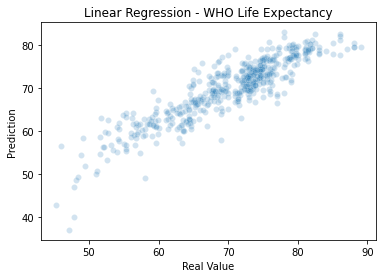

In [20]:
sns.scatterplot(x=y_test, y=y_predict, alpha = 0.2)
plt.xlabel("Real Value")
plt.ylabel("Prediction")
plt.title("Linear Regression - WHO Life Expectancy")